In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sb
from collections import defaultdict                  
from datetime import datetime as dt

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [210501,210508,210515,210522,210529,210605,210612,210619,210626,210703,210710,210717,210724,210731]

mta_df = get_data(week_nums)
mta_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2021-04-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,2021-04-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,2021-04-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,2021-04-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,2021-04-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008


In [3]:
# data from 24 April to 31 July 
mta_df.DATE.value_counts().sort_index() 

04/24/2021    29924
04/25/2021    29844
04/26/2021    29803
04/27/2021    29973
04/28/2021    29817
              ...  
07/26/2021    29816
07/27/2021    29928
07/28/2021    29923
07/29/2021    30016
07/30/2021    30061
Name: DATE, Length: 98, dtype: int64

In [4]:
#DataFrame size
mta_df.shape

(2930792, 12)

In [5]:
#general info about dataframe
mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930792 entries, 0 to 209462
Data columns (total 12 columns):
 #   Column                                                                Dtype         
---  ------                                                                -----         
 0   DATE_TIME                                                             datetime64[ns]
 1   C/A                                                                   object        
 2   UNIT                                                                  object        
 3   SCP                                                                   object        
 4   STATION                                                               object        
 5   LINENAME                                                              object        
 6   DIVISION                                                              object        
 7   DATE                                                                  obj

In [6]:
#Basic descriptive statistics for numerical columns.
mta_df.describe()

,ENTRIES,EXITS
count,2930792.00,2930792.00
mean,41884792.06,33535304.48
std,218918470.66,192793690.30
min,0.00,0.00
25%,216859.75,95426.00
50%,1420418.00,858701.00
75%,6050745.50,3980528.00
max,2147429816.00,2122941295.00


In [ ]:
# to connect to sqlite & create a database
conn=sql.connect('db_mta.db')
mta_df.to_sql('db_mta', conn)

In [7]:
conn=sql.connect('db_mta.db')
mta_database = pd.read_sql('SELECT * FROM db_mta', conn)
mta_database

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,2021-04-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898
1,1,2021-04-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903
2,2,2021-04-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918
3,3,2021-04-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977
4,4,2021-04-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930787,209458,2021-07-30 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,REGULAR,5554,589
2930788,209459,2021-07-30 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,REGULAR,5554,589
2930789,209460,2021-07-30 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,REGULAR,5554,589
2930790,209461,2021-07-30 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,REGULAR,5554,590


In [8]:
mta_df.columns=[column.strip() for column in mta_df.columns]
mta_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
# list for column groups 

turnstile_key = ['C/A','UNIT','SCP','STATION','DATE','TIME','DATE_TIME']

# list for stations of this project
mystations = ['49 ST','34 ST-HERALD SQ','86 ST' , 'TIMES SQ-42 ST', '42 ST-BRYANT PK', '34 ST-HERALD SQ']


In [10]:
#to create a column that called "Name Day"
mta_df["Name_Day"]= mta_df["DATE_TIME"].dt.day_name()
mta_df.head(10)

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Name_Day
0,2021-04-24 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,00:00:00,REGULAR,7561288,2582898,Saturday
1,2021-04-24 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,04:00:00,REGULAR,7561295,2582903,Saturday
2,2021-04-24 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,08:00:00,REGULAR,7561302,2582918,Saturday
3,2021-04-24 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,12:00:00,REGULAR,7561336,2582977,Saturday
4,2021-04-24 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,16:00:00,REGULAR,7561426,2583008,Saturday
5,2021-04-24 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/24/2021,20:00:00,REGULAR,7561578,2583031,Saturday
6,2021-04-25 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2021,00:00:00,REGULAR,7561638,2583044,Sunday
7,2021-04-25 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2021,04:00:00,REGULAR,7561643,2583045,Sunday
8,2021-04-25 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2021,08:00:00,REGULAR,7561649,2583055,Sunday
9,2021-04-25 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/25/2021,12:00:00,REGULAR,7561670,2583087,Sunday


In [11]:
# To verify that "C/A", "UNIT", "SCP", "STATION", "DATE and TIME" is unique
AA=(mta_df
 .groupby(turnstile_key)
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

AA.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES
249639,B024,R211,00-05-00,KINGS HWY,05/03/2021,08:00:00,2021-05-03 08:00:00,2
249640,B024,R211,00-05-00,KINGS HWY,05/03/2021,12:00:00,2021-05-03 12:00:00,2
249642,B024,R211,00-05-00,KINGS HWY,05/03/2021,20:00:00,2021-05-03 20:00:00,2
249643,B024,R211,00-05-00,KINGS HWY,05/04/2021,00:00:00,2021-05-04 00:00:00,2
249646,B024,R211,00-05-00,KINGS HWY,05/04/2021,12:00:00,2021-05-04 12:00:00,2


In [12]:
AA.ENTRIES.value_counts() 

1    2930692
2         50
Name: ENTRIES, dtype: int64

In [13]:
AA.head(52) # due to REGULAR and RECOVR AUD in DESC col.

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES
249639,B024,R211,00-05-00,KINGS HWY,05/03/2021,08:00:00,2021-05-03 08:00:00,2
249640,B024,R211,00-05-00,KINGS HWY,05/03/2021,12:00:00,2021-05-03 12:00:00,2
249642,B024,R211,00-05-00,KINGS HWY,05/03/2021,20:00:00,2021-05-03 20:00:00,2
249643,B024,R211,00-05-00,KINGS HWY,05/04/2021,00:00:00,2021-05-04 00:00:00,2
249646,B024,R211,00-05-00,KINGS HWY,05/04/2021,12:00:00,2021-05-04 12:00:00,2
249647,B024,R211,00-05-00,KINGS HWY,05/04/2021,16:00:00,2021-05-04 16:00:00,2
249648,B024,R211,00-05-00,KINGS HWY,05/04/2021,20:00:00,2021-05-04 20:00:00,2
249649,B024,R211,00-05-00,KINGS HWY,05/05/2021,00:00:00,2021-05-05 00:00:00,2
249650,B024,R211,00-05-00,KINGS HWY,05/05/2021,04:00:00,2021-05-05 04:00:00,2
249651,B024,R211,00-05-00,KINGS HWY,05/05/2021,08:00:00,2021-05-05 08:00:00,2


In [14]:
# to remove the duplicate entry
mta_df.sort_values(turnstile_key, 
                          inplace=True, ascending=False)
mta_df.drop_duplicates(subset= turnstile_key, inplace=True)

In [15]:
# To ensure that "C/A", "UNIT", "SCP", "STATION", "DATE and TIME" is unique
AA=(mta_df
 .groupby(turnstile_key)
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

AA.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,04/24/2021,00:00:00,2021-04-24 00:00:00,1
1953842,R138,R293,00-03-03,34 ST-PENN STA,07/27/2021,14:00:00,2021-07-27 14:00:00,1
1953822,R138,R293,00-03-03,34 ST-PENN STA,07/23/2021,02:00:00,2021-07-23 02:00:00,1
1953823,R138,R293,00-03-03,34 ST-PENN STA,07/23/2021,06:00:00,2021-07-23 06:00:00,1
1953824,R138,R293,00-03-03,34 ST-PENN STA,07/23/2021,10:00:00,2021-07-23 10:00:00,1


In [16]:
# Drop Desc Column.  
mta_df = mta_df.drop(["DESC"], axis=1, errors="ignore")
mta_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day
209462,2021-07-30 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,21:00:00,5554,591,Friday
209461,2021-07-30 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,17:00:00,5554,590,Friday
209460,2021-07-30 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,13:00:00,5554,589,Friday
209459,2021-07-30 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,09:00:00,5554,589,Friday
209458,2021-07-30 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/30/2021,05:00:00,5554,589,Friday


In [17]:
# Sort for Sequential Turnstile Data
mta_df= mta_df.sort_values(['UNIT', 'C/A', 'SCP', 'DATE','TIME']).reset_index()
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day
0,10724,2021-04-24 01:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,01:00:00,1939674,4564525,Saturday
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday


In [18]:
# Determining Total Entries and Exits per period
mta_df['ENT DIFF'] = mta_df['ENTRIES'].diff()
mta_df['EX DIFF'] = mta_df['EXITS'].diff()
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF
0,10724,2021-04-24 01:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,01:00:00,1939674,4564525,Saturday,NaN,NaN
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday,1.00,13.00
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday,18.00,104.00
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday,46.00,194.00
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday,69.00,201.00


In [19]:
#delete first row because of null value
mta_df.dropna(subset=["ENT DIFF"], axis=0, inplace=True)
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday,1.00,13.00
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday,18.00,104.00
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday,46.00,194.00
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday,69.00,201.00
5,10729,2021-04-24 21:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,21:00:00,1939849,4565184,Saturday,41.00,147.00


In [20]:
# find null values
mta_df.isna().sum()

index        0
DATE_TIME    0
C/A          0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DIVISION     0
DATE         0
TIME         0
ENTRIES      0
EXITS        0
Name_Day     0
ENT DIFF     0
EX DIFF      0
dtype: int64

In [21]:
mta_df.sample(25 , random_state=33)  # index 14260 is outlier values

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF
1678291,24622,2021-06-30 04:00:00,C024,R214,00-00-02,77 ST,R,BMT,06/30/2021,04:00:00,6307068,4240304,Wednesday,2.00,10.00
878105,14999,2021-06-23 20:00:00,B016,R098,00-00-01,CHURCH AV,BQ,BMT,06/23/2021,20:00:00,2593643,5683125,Wednesday,0.00,494.00
21592,42358,2021-05-15 00:00:00,J025,R003,00-00-01,CYPRESS HILLS,J,BMT,05/15/2021,00:00:00,2014752,838849,Saturday,11.00,11.00
230670,3455,2021-06-10 12:00:00,A022,R022,01-06-00,34 ST-HERALD SQ,BDFMNQRW,BMT,06/10/2021,12:00:00,67841141,18947981,Thursday,15.00,72.00
2747777,129916,2021-05-08 15:13:56,PTH22,R540,00-05-05,PATH NEW WTC,1,PTH,05/08/2021,15:13:56,415895,396982,Saturday,30.00,58.00
908653,69191,2021-06-23 08:00:00,N124,R103,00-00-00,BROADWAY JCT,ACJLZ,IND,06/23/2021,08:00:00,4810556,23237544,Wednesday,24.00,166.00
2130770,132638,2021-07-09 09:00:00,R107D,R305,04-00-02,WTC-CORTLANDT,1,IRT,07/09/2021,09:00:00,175405,446591,Friday,14.00,42.00
1232923,190853,2021-06-11 05:00:00,R523,R147,00-06-00,61 ST WOODSIDE,7,IRT,06/11/2021,05:00:00,1762945,2178287,Friday,2.00,3.00
2884382,120219,2021-05-06 16:24:04,PTH04,R551,00-04-00,GROVE STREET,1,PTH,05/06/2021,16:24:04,47840,64868,Thursday,17.00,20.00
2821826,118265,2021-06-19 10:48:07,PTH01,R549,00-01-06,NEWARK HW BMEBE,1,PTH,06/19/2021,10:48:07,319,76393,Saturday,6.00,29.00


In [22]:
#to overcome the outliers /1
mta_df.loc[(mta_df['SCP'] != mta_df['SCP'].shift(+1)) |
           (mta_df['C/A'] != mta_df['C/A'].shift(+1)),
           ['ENT DIFF', 'EX DIFF']] = 0.0

In [23]:
#to overcome the outliers /2
mta_df.loc[
    (mta_df['ENT DIFF'] < -3000) | (mta_df['EX DIFF'] < -3000),
    ['ENT DIFF', 'EX DIFF']] = 0.0
 
mta_df.loc[
    (mta_df['ENT DIFF'] > 8000) | (mta_df['EX DIFF'] > 8000),
    ['ENT DIFF', 'EX DIFF']] = 0.0
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday,0.00,0.00
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday,18.00,104.00
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday,46.00,194.00
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday,69.00,201.00
5,10729,2021-04-24 21:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,21:00:00,1939849,4565184,Saturday,41.00,147.00


In [24]:
#to overcome the outliers /3
# the absolute value of entries and exits
mta_df['ENT DIFF (ABS)'] = mta_df['ENT DIFF'].abs()
mta_df['EX DIFF (ABS)'] = mta_df['EX DIFF'].abs()
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF,ENT DIFF (ABS),EX DIFF (ABS)
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday,0.00,0.00,0.00,0.00
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday,18.00,104.00,18.00,104.00
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday,46.00,194.00,46.00,194.00
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday,69.00,201.00,69.00,201.00
5,10729,2021-04-24 21:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,21:00:00,1939849,4565184,Saturday,41.00,147.00,41.00,147.00


In [25]:
mta_df['TOTAL TRAFFIC'] =  mta_df['ENT DIFF (ABS)'] + mta_df['EX DIFF (ABS)']
mta_df.head()

,index,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,Name_Day,ENT DIFF,EX DIFF,ENT DIFF (ABS),EX DIFF (ABS),TOTAL TRAFFIC
1,10725,2021-04-24 05:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,05:00:00,1939675,4564538,Saturday,0.00,0.00,0.00,0.00,0.00
2,10726,2021-04-24 09:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,09:00:00,1939693,4564642,Saturday,18.00,104.00,18.00,104.00,122.00
3,10727,2021-04-24 13:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,13:00:00,1939739,4564836,Saturday,46.00,194.00,46.00,194.00,240.00
4,10728,2021-04-24 17:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,17:00:00,1939808,4565037,Saturday,69.00,201.00,69.00,201.00,270.00
5,10729,2021-04-24 21:00:00,A058,R001,01-00-00,WHITEHALL S-FRY,R1W,BMT,04/24/2021,21:00:00,1939849,4565184,Saturday,41.00,147.00,41.00,147.00,188.00


In [26]:
#total traffic
station_daily = mta_df.groupby(turnstile_key)[['TOTAL TRAFFIC']].sum().reset_index()
station_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,TOTAL TRAFFIC
0,A002,R051,02-00-00,59 ST,04/24/2021,00:00:00,2021-04-24 00:00:00,0.00
1,A002,R051,02-00-00,59 ST,04/24/2021,04:00:00,2021-04-24 04:00:00,12.00
2,A002,R051,02-00-00,59 ST,04/24/2021,08:00:00,2021-04-24 08:00:00,22.00
3,A002,R051,02-00-00,59 ST,04/24/2021,12:00:00,2021-04-24 12:00:00,93.00
4,A002,R051,02-00-00,59 ST,04/24/2021,16:00:00,2021-04-24 16:00:00,121.00
5,A002,R051,02-00-00,59 ST,04/24/2021,20:00:00,2021-04-24 20:00:00,175.00
6,A002,R051,02-00-00,59 ST,04/25/2021,00:00:00,2021-04-25 00:00:00,73.00
7,A002,R051,02-00-00,59 ST,04/25/2021,04:00:00,2021-04-25 04:00:00,6.00
8,A002,R051,02-00-00,59 ST,04/25/2021,08:00:00,2021-04-25 08:00:00,16.00
9,A002,R051,02-00-00,59 ST,04/25/2021,12:00:00,2021-04-25 12:00:00,53.00


In [27]:
print("Unique STATIONS")
mta_df.STATION.unique()

Unique STATIONS


array(['WHITEHALL S-FRY', 'SOUTH FERRY', 'CYPRESS HILLS', '75 ST-ELDERTS',
       '85 ST-FOREST PK', 'WOODHAVEN BLVD', '104 ST', '111 ST', '121 ST',
       '42 ST-PORT AUTH', '34 ST-PENN STA', 'FULTON ST', '5 AV/53 ST',
       'LEXINGTON AV/53', 'JKSN HT-ROOSVLT', '74 ST-BROADWAY',
       'JAMAICA 179 ST', '47-50 STS ROCK', '42 ST-BRYANT PK',
       '34 ST-HERALD SQ', 'SUTPHIN-ARCHER', 'JAMAICA CENTER', 'WALL ST',
       'CHAMBERS ST', 'WORLD TRADE CTR', 'PARK PLACE', 'TIMES SQ-42 ST',
       '125 ST', '168 ST', 'DYCKMAN ST', '207 ST', '215 ST',
       'MARBLE HILL-225', '231 ST', 'BOWLING GREEN', 'BROOKLYN BRIDGE',
       'GRD CNTRL-42 ST', '51 ST', '59 ST', 'WOODLAWN', '3 AV-149 ST',
       '5 AVE', 'FLUSHING-MAIN', 'NEVINS ST', 'ATL AV-BARCLAY',
       'BERGEN ST', 'GRAND ARMY PLAZ', 'EASTN PKWY-MUSM', 'NOSTRAND AV',
       'CROWN HTS-UTICA', 'SUTTER AV-RUTLD', 'SARATOGA AV', 'ROCKAWAY AV',
       'JUNIUS ST', 'PENNSYLVANIA AV', 'VAN SICLEN AV', 'NEW LOTS AV',
       'ST. GEORGE', '

In [44]:
ALL_stations = mta_df.groupby('STATION')['TOTAL TRAFFIC'].sum() 
ALL_stations.head(30)

STATION
1 AV              1949609.00
103 ST            2114629.00
103 ST-CORONA     2010906.00
104 ST             288706.00
110 ST             889968.00
111 ST            1346298.00
116 ST            2168384.00
116 ST-COLUMBIA    491160.00
121 ST             172612.00
125 ST            5828088.00
135 ST            1114213.00
137 ST CITY COL    936192.00
138/GRAND CONC     326100.00
14 ST             3766814.00
14 ST-UNION SQ    6175168.00
145 ST            2780820.00
149/GRAND CONC     884343.00
14TH STREET        671324.00
15 ST-PROSPECT     356247.00
155 ST             450870.00
157 ST             802175.00
161/YANKEE STAD   1747536.00
163 ST-AMSTERDM    341238.00
167 ST            1478294.00
168 ST            1755661.00
169 ST             622878.00
170 ST            1170563.00
174 ST             607215.00
174-175 STS        372183.00
175 ST             823921.00
Name: TOTAL TRAFFIC, dtype: float64

In [66]:
ALL_stations = mta_df.groupby('STATION')['TOTAL TRAFFIC', 'ENT DIFF (ABS)', 'EX DIFF (ABS)'].sum()
    
ALL_stations.head(30)

<ipython-input-66-c1ce585c6d06>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ALL_stations = mta_df.groupby('STATION')['TOTAL TRAFFIC', 'ENT DIFF (ABS)', 'EX DIFF (ABS)'].sum()


,TOTAL TRAFFIC,ENT DIFF (ABS),EX DIFF (ABS)
STATION,,,
1 AV,1949609.00,710365.00,1239244.00
103 ST,2114629.00,1025981.00,1088648.00
103 ST-CORONA,2010906.00,981982.00,1028924.00
104 ST,288706.00,171521.00,117185.00
110 ST,889968.00,381520.00,508448.00
111 ST,1346298.00,773051.00,573247.00
116 ST,2168384.00,1094845.00,1073539.00
116 ST-COLUMBIA,491160.00,249987.00,241173.00
121 ST,172612.00,99595.00,73017.00


In [67]:
Light_Traffic = ALL_stations.sort_values(by='TOTAL TRAFFIC', ascending=True).head(25)
Light_Traffic

,TOTAL TRAFFIC,ENT DIFF (ABS),EX DIFF (ABS)
STATION,,,
ORCHARD BEACH,586.00,383.00,203.00
BROAD CHANNEL,17855.00,10950.00,6905.00
TOMPKINSVILLE,27138.00,27137.00,1.00
BEACH 105 ST,30185.00,11206.00,18979.00
BEACH 98 ST,42450.00,16598.00,25852.00
BEACH 44 ST,71715.00,28794.00,42921.00
NEPTUNE AV,72990.00,46932.00,26058.00
AQUEDUCT RACETR,73179.00,61910.00,11269.00
BEACH 90 ST,74949.00,31635.00,43314.00


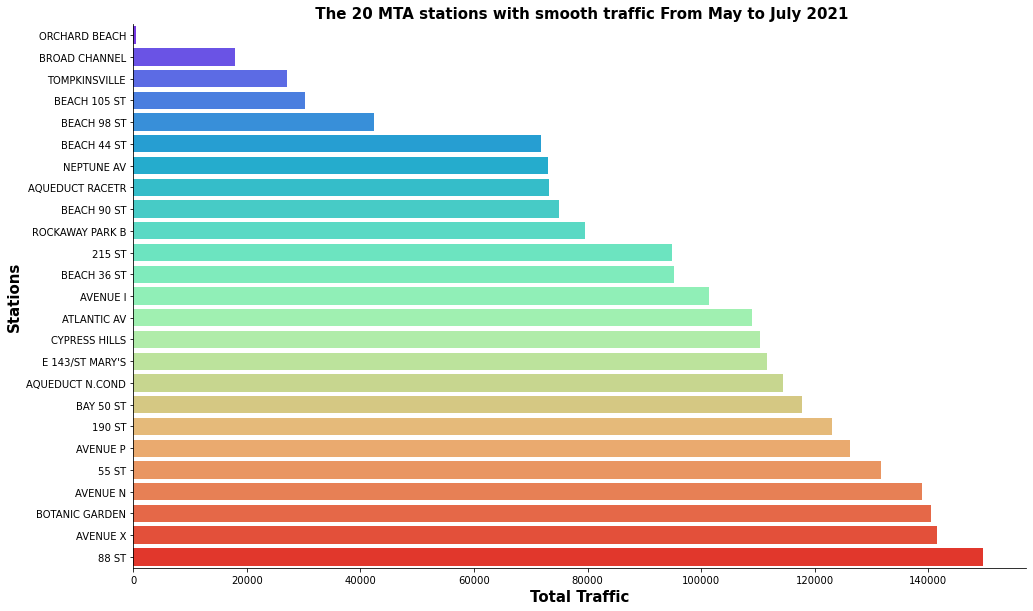

In [68]:
plt.figure(figsize=[16,10])
ax = sb.barplot(data=Light_Traffic.reset_index(),x='TOTAL TRAFFIC',y='STATION',palette='rainbow')
plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Stations',weight='bold',fontsize=15)

plt.title(' The 20 MTA stations with smooth traffic From May to July 2021', weight='bold',fontsize='15')

sb.despine()

In [72]:
#lets start explore the project's stations

myturnstile_key=  ['C/A','UNIT','SCP','STATION','DATE','TIME','DATE_TIME', 'Name_Day']
my_stations = mta_df[mta_df.STATION.isin(mystations)]
my_stations.groupby(myturnstile_key)[['TOTAL TRAFFIC']].sum().reset_index().sample(10)

,C/A,UNIT,SCP,STATION,DATE,TIME,DATE_TIME,Name_Day,TOTAL TRAFFIC
95039,R151,R033,00-00-01,TIMES SQ-42 ST,05/30/2021,20:00:00,2021-05-30 20:00:00,Sunday,258.00
79234,N507,R023,00-03-06,34 ST-HERALD SQ,07/17/2021,04:00:00,2021-07-17 04:00:00,Saturday,30.00
119202,R250,R179,00-00-07,86 ST,05/22/2021,16:00:00,2021-05-22 16:00:00,Saturday,149.00
62731,N505,R022,02-06-00,34 ST-HERALD SQ,07/12/2021,16:00:00,2021-07-12 16:00:00,Monday,286.00
94293,R151,R033,00-00-00,TIMES SQ-42 ST,05/04/2021,00:00:00,2021-05-04 00:00:00,Tuesday,152.00
80394,R143,R032,02-00-01,TIMES SQ-42 ST,07/14/2021,16:00:00,2021-07-14 16:00:00,Wednesday,320.00
25992,A025,R023,01-03-02,34 ST-HERALD SQ,05/18/2021,00:00:00,2021-05-18 00:00:00,Tuesday,283.00
81075,R143,R032,02-00-02,TIMES SQ-42 ST,07/30/2021,04:00:00,2021-07-30 04:00:00,Friday,18.00
6445,A014,R081,02-00-01,49 ST,07/29/2021,12:00:00,2021-07-29 12:00:00,Thursday,108.00
98433,R151,R033,00-00-07,TIMES SQ-42 ST,05/10/2021,00:00:00,2021-05-10 00:00:00,Monday,84.00


In [73]:
each_station = my_stations.groupby('STATION')['TOTAL TRAFFIC', 'ENT DIFF (ABS)', 'EX DIFF (ABS)'].sum()
    
each_station.head(50)

<ipython-input-73-8528dfc706cd>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  each_station = my_stations.groupby('STATION')['TOTAL TRAFFIC', 'ENT DIFF (ABS)', 'EX DIFF (ABS)'].sum()


,TOTAL TRAFFIC,ENT DIFF (ABS),EX DIFF (ABS)
STATION,,,
34 ST-HERALD SQ,7308134.00,3168834.00,4139300.00
42 ST-BRYANT PK,2047254.00,851135.00,1196119.00
49 ST,1099055.00,476431.00,622624.00
86 ST,6561764.00,2812037.00,3749727.00
TIMES SQ-42 ST,5160226.00,2202629.00,2957597.00


In [74]:
less_Traffic = each_station.sort_values(by='TOTAL TRAFFIC', ascending=True).head()
less_Traffic


,TOTAL TRAFFIC,ENT DIFF (ABS),EX DIFF (ABS)
STATION,,,
49 ST,1099055.00,476431.00,622624.00
42 ST-BRYANT PK,2047254.00,851135.00,1196119.00
TIMES SQ-42 ST,5160226.00,2202629.00,2957597.00
86 ST,6561764.00,2812037.00,3749727.00
34 ST-HERALD SQ,7308134.00,3168834.00,4139300.00


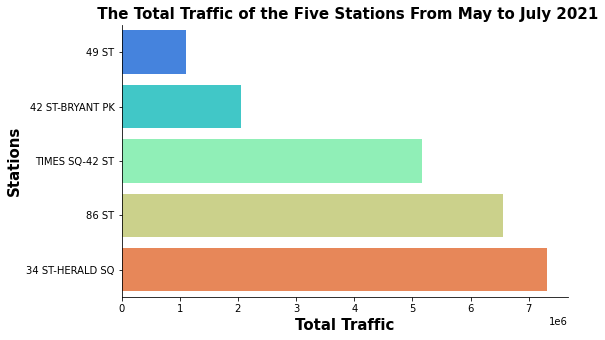

In [77]:
plt.figure(figsize=[8,5])
ax = sb.barplot(data=less_Traffic.reset_index(),x='TOTAL TRAFFIC',y='STATION',palette='rainbow')

plt.xlabel('Total Traffic',weight='bold',fontsize=15)
plt.ylabel('Stations',weight='bold',fontsize=15)

plt.title(' The Total Traffic of the Five Stations From May to July 2021', weight='bold',fontsize='15')

sb.despine()

In [83]:
lines = my_stations.groupby(["STATION", 'LINENAME'])['TOTAL TRAFFIC'].sum().reset_index()
lines.head(50)

,STATION,LINENAME,TOTAL TRAFFIC
0,34 ST-HERALD SQ,BDFMNQRW,7308134.00
1,42 ST-BRYANT PK,BDFM7,2047254.00
2,49 ST,NQRW,1099055.00
3,86 ST,1,1365213.00
4,86 ST,456,3330312.00
5,86 ST,BC,724053.00
6,86 ST,N,238667.00
7,86 ST,R,903519.00
8,TIMES SQ-42 ST,1237ACENQRS,1108455.00
9,TIMES SQ-42 ST,1237ACENQRSW,3020708.00


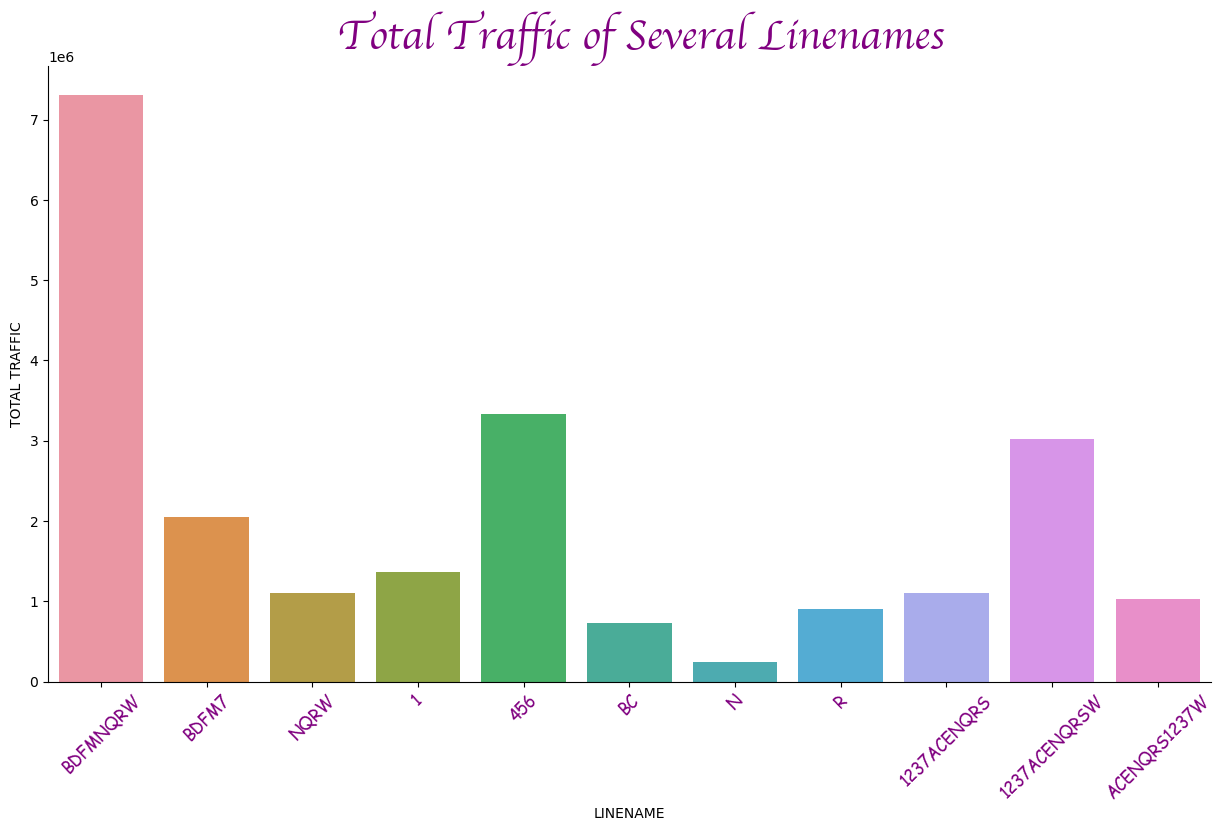

In [130]:
plt.figure(figsize=[15,8])
ax = sb.barplot(data=lines.head(20), x='LINENAME',y='TOTAL TRAFFIC')
ax.set_xticklabels(ax.get_xticklabels(),fontsize = '12', family = 'fantasy',color='purple', rotation=45);

plt.title('  Total Traffic of Several Linenames', weight='bold',fontsize='30',family='cursive', color='purple');

sb.despine()

In [112]:
mta_busiest_day = my_stations.groupby("Name_Day").sum().sort_values("TOTAL TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,Name_Day,index,ENTRIES,EXITS,ENT DIFF,EX DIFF,ENT DIFF (ABS),EX DIFF (ABS),TOTAL TRAFFIC
0,Thursday,1515758862,841262423569,846243265568,1541871.00,2052864.00,1578523.00,2060112.00,3638635.00
1,Friday,1514453994,841209522288,847157234320,1503782.00,2039464.00,1542890.00,2046420.00,3589310.00
2,Wednesday,1513110722,842970091331,847514616092,1521771.00,2013399.00,1558325.00,2020197.00,3578522.00
3,Tuesday,1518568166,845809987295,850591855944,1488700.00,1961156.00,1525470.00,1967888.00,3493358.00
4,Monday,1552985397,848375429555,856741797853,1327445.00,1790619.00,1362509.00,1797189.00,3159698.00
5,Saturday,1545819332,847990306832,891688834919,1037734.00,1515590.00,1070000.00,1520296.00,2590296.00
6,Sunday,1514973792,848748584490,858818696466,845033.00,1249595.00,873349.00,1253265.00,2126614.00


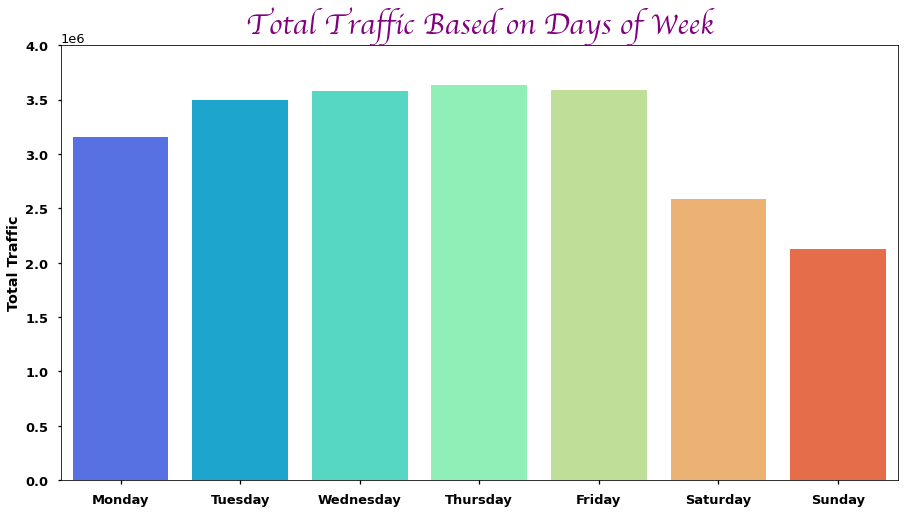

In [122]:


plt.figure(figsize=(15,8)),
plt.style.use('seaborn-talk')

ax = sb.barplot(x="Name_Day",y="TOTAL TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"] , palette='rainbow')

plt.title("Total Traffic Based on Days of Week", weight='bold',fontsize='30',family='cursive', color='purple')
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,4000000)
plt.show()

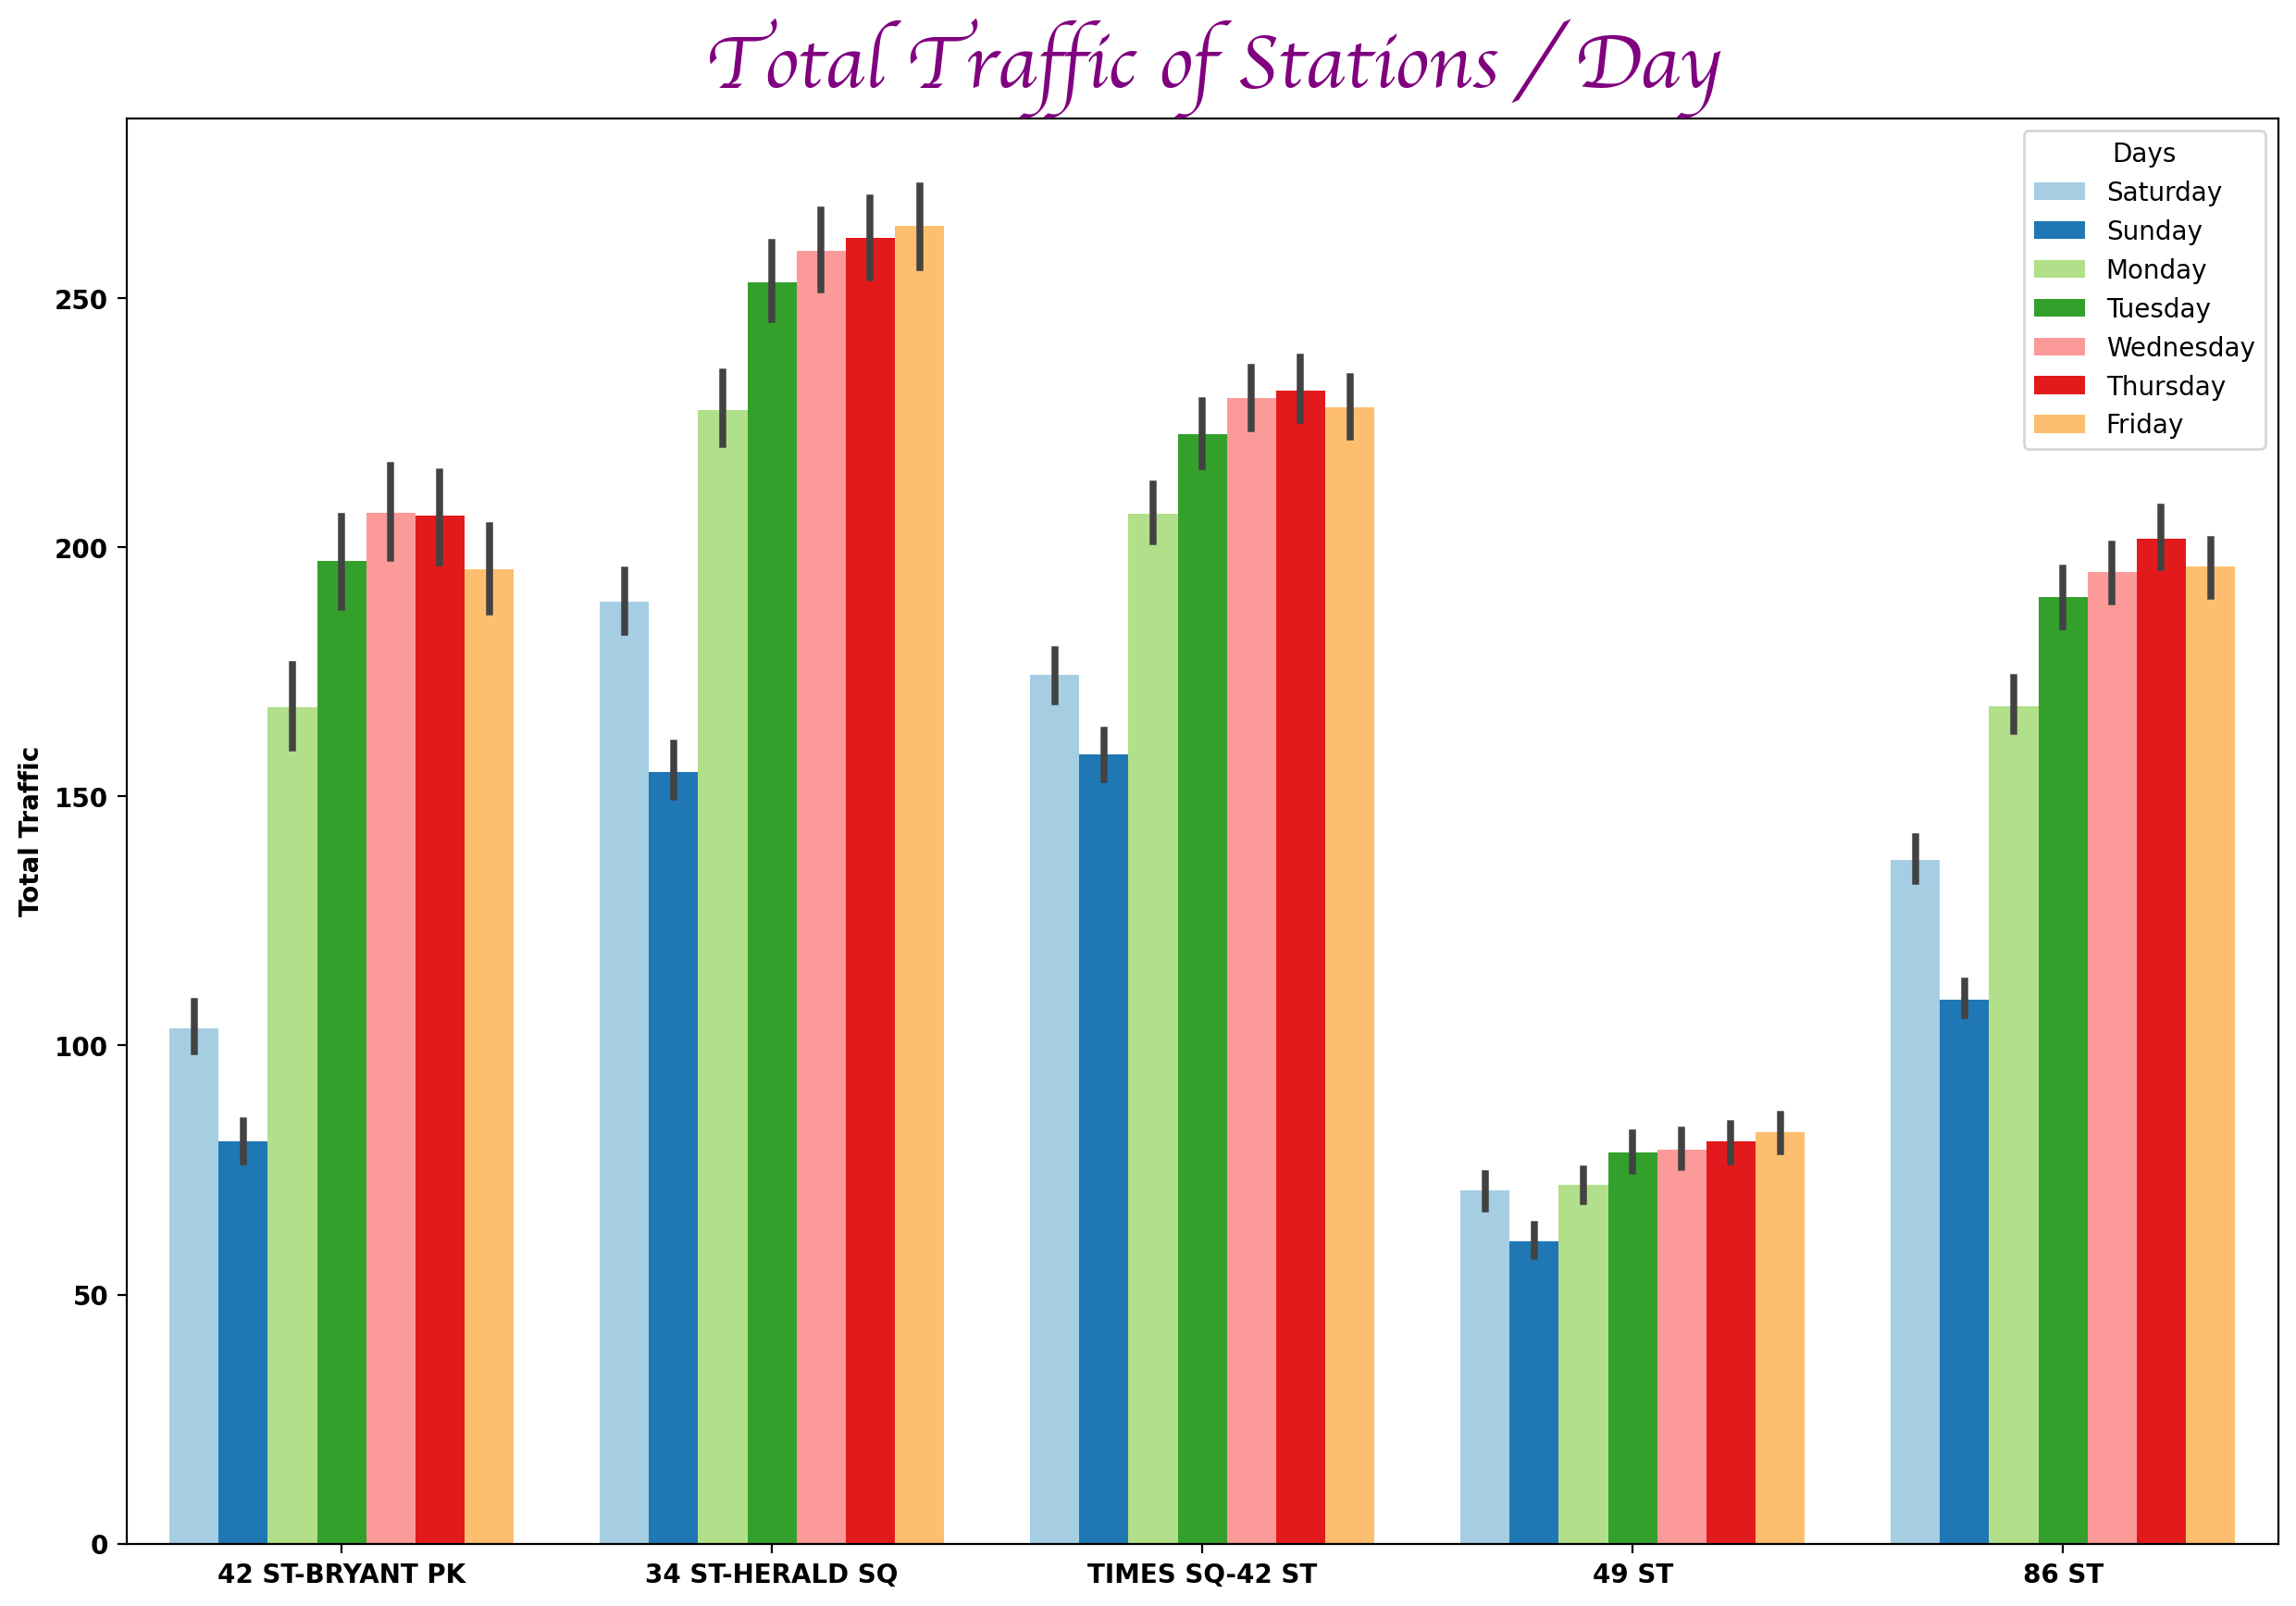

In [137]:

#the 5 Stations per Day

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sb.barplot(x="STATION", y="TOTAL TRAFFIC", hue="Name_Day",data=my_stations, saturation=1, palette='Paired')
plt.title(" Total Traffic of Stations / Day",  weight='bold',fontsize='30',family='cursive', color='purple')
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days")
plt.show()